In [18]:
import numpy as np
import os
import math
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import MIP results

In [19]:
# path = "../sequential_metaheuristic/results/LIR_sorted_filtered/nodes/*.csv"
path = "../../HPC_results/seq_mip/units/*.csv"
files = glob.glob(path)

print(files)

['../../HPC_results/seq_mip/units\\final_solution_T20_N30_R500_U1.csv', '../../HPC_results/seq_mip/units\\final_solution_T20_N30_R500_U10.csv', '../../HPC_results/seq_mip/units\\final_solution_T20_N30_R500_U2.csv', '../../HPC_results/seq_mip/units\\final_solution_T20_N30_R500_U3.csv', '../../HPC_results/seq_mip/units\\final_solution_T20_N30_R500_U4.csv', '../../HPC_results/seq_mip/units\\final_solution_T20_N30_R500_U5.csv', '../../HPC_results/seq_mip/units\\final_solution_T20_N30_R500_U6.csv', '../../HPC_results/seq_mip/units\\final_solution_T20_N30_R500_U7.csv', '../../HPC_results/seq_mip/units\\final_solution_T20_N30_R500_U8.csv', '../../HPC_results/seq_mip/units\\final_solution_T20_N30_R500_U9.csv']


In [20]:
results_MIP = pd.DataFrame(columns=["number_of_units", "elapsed time", "best score", "config", "seed"])

for file in files:
    results_per_file = pd.DataFrame(columns=["number_of_units", "elapsed time", "best score", "config", "seed"])
    # best score = file content
    imported_df = pd.read_csv(file)

    results_per_file['elapsed time'] = imported_df['elapsed time']
    results_per_file['best score'] = imported_df['score']
    results_per_file['config'] = imported_df['config']
    results_per_file['seed'] = imported_df['seed']

    # extract N from filename using .split()
    split1 = file.replace("\\", "_")
    split2 = split1.replace(".", "_")
    split3 = split2.split("_")

    for seq in split3:
        if "U" in seq:
            _, num_units = seq.split("U")

    results_per_file['number_of_units'] = int(num_units)

    # add to dataframe
    results_MIP = pd.concat(
        [results_MIP, pd.DataFrame.from_dict(results_per_file, orient="columns")]
    )

results_MIP['elapsed time (min)'] = results_MIP['elapsed time']/60

C:\Users\isvandroffelaa\AppData\Local\Temp\ipykernel_24796\757906666.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_MIP = pd.concat(


In [21]:
results_MIP

,number_of_units,elapsed time,best score,config,seed,elapsed time (min)
0,1,2.322139,0.002,0,0,0.038702
1,1,2.101434,0.002,0,1,0.035024
2,1,2.122241,0.002,0,2,0.035371
3,1,2.137482,0.002,0,3,0.035625
4,1,2.111553,0.002,0,4,0.035193
...,...,...,...,...,...,...
45,9,69.968768,0.674,9,0,1.166146
46,9,69.758060,0.674,9,1,1.162634
47,9,69.697351,0.674,9,2,1.161623
48,9,70.221138,0.674,9,3,1.170352


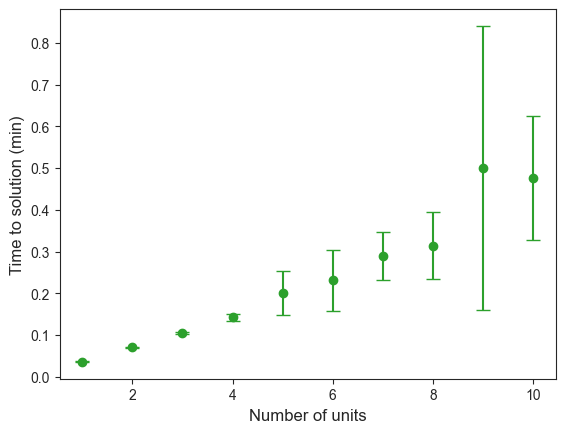

In [22]:
errorplot_x = list(results_MIP['number_of_units'].unique())
errorplot_y = []
errorplot_yerr = []
for num_units in results_MIP['number_of_units'].unique():
    results_subset = results_MIP.query(f"number_of_units == {num_units}")
    errorplot_y.append(np.mean(results_subset['elapsed time (min)']))
    errorplot_yerr.append(np.std(results_subset['elapsed time (min)']))

plt.errorbar(x=errorplot_x, y=errorplot_y, yerr=errorplot_yerr, fmt='o', capsize=5, c='tab:green')
plt.xlabel('Number of units', fontdict={'size':12})
plt.ylabel('Time to solution (min)', fontdict={'size':12})

# plt.savefig('figs/cbc_scaling_units.png', bbox_inches='tight', dpi=300)
plt.show()

In [23]:
# ax = sns.boxplot(data=results_MIP, x='number_of_units', y='elapsed time', native_scale=True,
#                  color='tab:green', linewidth=0.8, flierprops={"marker": "D", "markersize": 3})
# ax.set(xlabel='Number of units', ylabel='Time to solution (s)')
# ax.set_ylim([0, 75])
# plt.savefig('figs/boxplot_mip_units.png', dpi=300)
# plt.show()

In [24]:
from collections import defaultdict

score_MIP_df = results_MIP[results_MIP["seed"] == 0][['number_of_units', 'config', 'best score']]
# score_MIP = results_MIP[['number of nodes', 'config', 'best score']]
# score_MIP.rename(columns={"best score": "score"})
# score_MIP.reset_index(drop=True, inplace=True)

score_MIP = defaultdict(dict)
for index, row in score_MIP_df.iterrows():
    score_MIP[row['number_of_units']][row['config']] = row['best score']

score_MIP

defaultdict(dict,
            {1: {0: 0.002,
              1: 0.304,
              2: 0.002,
              3: 0.016,
              4: 0.192,
              5: 0.008,
              6: 0.286,
              7: 0.002,
              8: 0.058,
              9: 0.058},
             10: {0: 0.698,
              1: 0.71,
              2: 0.592,
              3: 0.598,
              4: 0.564,
              6: 0.448,
              7: 0.558,
              8: 0.4,
              9: 0.55},
             2: {0: 0.414,
              1: 0.054,
              2: 0.026,
              3: 0.036,
              4: 0.082,
              5: 0.184,
              6: 0.238,
              7: 0.014,
              8: 0.1,
              9: 0.236},
             3: {0: 0.326,
              1: 0.178,
              2: 0.6,
              3: 0.234,
              4: 0.176,
              5: 0.262,
              6: 0.01,
              7: 0.072,
              8: 0.246,
              9: 0.13},
             4: {0: 0.1,
              

## Import HPC seq-borg results

In [25]:
results_seqBORG = pd.read_csv('cleaned_data/seq_borg_MH/df_seq_borg_units_cleaned.csv')

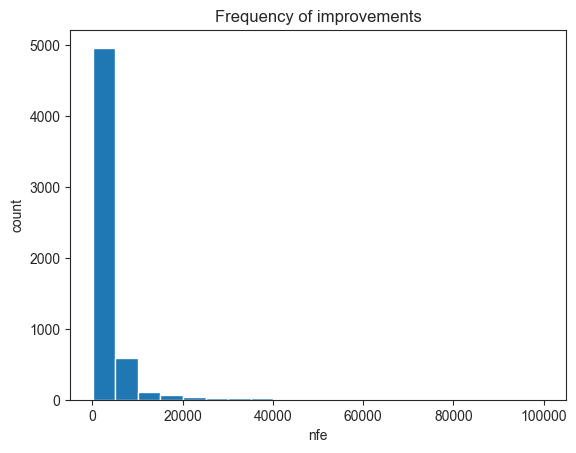

In [26]:
plt.hist(results_seqBORG['nfe'], bins=20)
plt.title('Frequency of improvements')
plt.xlabel('nfe')
plt.ylabel('count')
plt.show()

In [27]:
results_seqBORG['elapsed time (min)'] = results_seqBORG['elapsed_time']/60

In [34]:
results_seqBORG[results_seqBORG['scaled score'] == 0]

,Unnamed: 0,nfe,best_score,elapsed_time,pi_0,pi_1,pi_2,pi_3,pi_4,pi_5,...,probability_SPX,probability_UM,number_of_units,number_of_nodes,config,seed,scaled score,improvement,elapsed time (min),hue


## Plot convergence

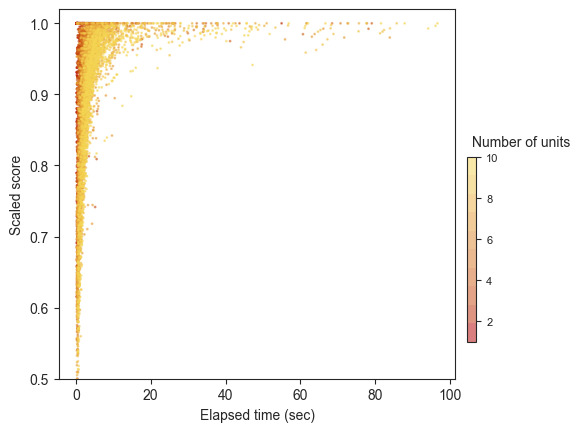

In [29]:
from matplotlib.lines import Line2D
from matplotlib.colors import LinearSegmentedColormap, to_rgb

cmap_name = 'my_list'
my_rgb = []
my_rgb_r = []
# colors = ['#b40000', '#c03607', '#cb5311', '#d56d1c', '#df8528', '#e89c33', '#f0b43e', '#f8cb4a', '#ffe356']
colors = ['#b40000', '#c03808', '#cb5614', '#d57120', '#de8a2d', '#e7a339', '#eebc46', '#f5d553', '#fbed61']
colors = ['#b40000', '#c03808', '#cb5614', '#d57120', '#de8a2d', '#e7a339', '#eebc46', '#f5d553']
colors_r = ['#f5d553', '#eebc46', '#e7a339', '#de8a2d', '#d57120', '#cb5614', '#c03808', '#b40000']
for color in colors:
    my_rgb.append(to_rgb(color))
for color in colors_r: 
    my_rgb_r.append(to_rgb(color))
my_cmap = LinearSegmentedColormap.from_list(cmap_name, my_rgb, N=10)
my_cmap_r = LinearSegmentedColormap.from_list(cmap_name, my_rgb_r, N=10)

fig, ax = plt.subplots()
scatter = ax.scatter(results_seqBORG['elapsed_time'], results_seqBORG['scaled score'],
                     c=results_seqBORG['number_of_units'], s=1, cmap=my_cmap, alpha=0.5)
# scatter = ax.scatter(results_seqBORG['nfe'], results_seqBORG['scaled score'], c=results_seqBORG['number_of_units'], s=1, cmap=my_cmap)
sns.set_style('ticks')

ax.set_ylabel('Scaled score')
ax.set_xlabel('Elapsed time (sec)')
# ax.set_xlabel('nfe')
plt.ylim([0.5,1.02])
# plt.xlim([0,0.6])

clb = plt.colorbar(scatter, shrink=0.5, anchor=(-0.2,0.2))
clb.ax.tick_params(labelsize=8)
clb.ax.set_title('Number of units', horizontalalignment='left', verticalalignment='bottom', fontsize=10)

plt.show()

# fig.savefig('figs/sequential_simopt_units_BORG.png', dpi=500, bbox_inches="tight")

In [30]:
score_MIP

defaultdict(dict,
            {1: {0: 0.002,
              1: 0.304,
              2: 0.002,
              3: 0.016,
              4: 0.192,
              5: 0.008,
              6: 0.286,
              7: 0.002,
              8: 0.058,
              9: 0.058},
             10: {0: 0.698,
              1: 0.71,
              2: 0.592,
              3: 0.598,
              4: 0.564,
              6: 0.448,
              7: 0.558,
              8: 0.4,
              9: 0.55},
             2: {0: 0.414,
              1: 0.054,
              2: 0.026,
              3: 0.036,
              4: 0.082,
              5: 0.184,
              6: 0.238,
              7: 0.014,
              8: 0.1,
              9: 0.236},
             3: {0: 0.326,
              1: 0.178,
              2: 0.6,
              3: 0.234,
              4: 0.176,
              5: 0.262,
              6: 0.01,
              7: 0.072,
              8: 0.246,
              9: 0.13},
             4: {0: 0.1,
              

In [31]:
vary_param = 'units'
# sort results_df
results_seqBORG.sort_values(by=[f'number_of_{vary_param}', 'config', 'seed', 'nfe'], inplace=True)

# scale score to optimum found with MIP solver
scaled_result_list = []
for index, row in results_seqBORG.iterrows():
    try:
        score_MIP_at_row = score_MIP[int(row[f'number_of_{vary_param}'])][int(row['config'])]
    except: 
        score_MIP_at_row = row['best_score']
        
    scaled_score = row['best_score'] / score_MIP_at_row
    scaled_result_list.append(scaled_score)

results_seqBORG['scaled score'] = scaled_result_list

In [32]:
results_seqBORG['hue'] = results_seqBORG['number_of_units'].map(str) + '-' + results_seqBORG['config'].map(str) + '-' + results_seqBORG['seed'].map(str)

ValueError: 0        1
1        1
2        1
3        1
4        1
        ..
5902    10
5903    10
5904    10
5905    10
5906    10
Name: number_of_units, Length: 5908, dtype: int64 is not a valid value for color

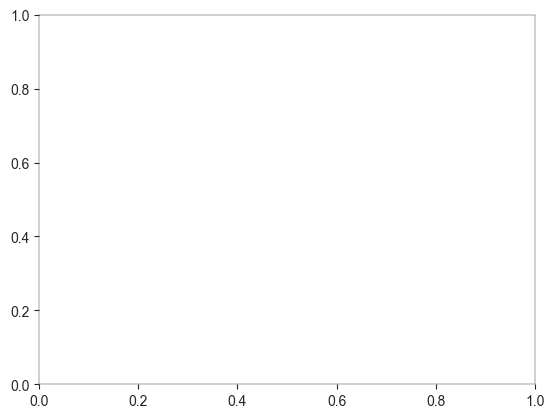

In [51]:
from matplotlib.lines import Line2D
from matplotlib.colors import LinearSegmentedColormap, to_rgb

cmap_name = 'my_list'
my_rgb = []
my_rgb_r = []
# colors = ['#b40000', '#c03607', '#cb5311', '#d56d1c', '#df8528', '#e89c33', '#f0b43e', '#f8cb4a', '#ffe356']
colors = ['#b40000', '#c03808', '#cb5614', '#d57120', '#de8a2d', '#e7a339', '#eebc46', '#f5d553', '#fbed61']
colors = ['#b40000', '#c03808', '#cb5614', '#d57120', '#de8a2d', '#e7a339', '#eebc46', '#f5d553']
colors_r = ['#f5d553', '#eebc46', '#e7a339', '#de8a2d', '#d57120', '#cb5614', '#c03808', '#b40000']
for color in colors:
    my_rgb.append(to_rgb(color))
for color in colors_r: 
    my_rgb_r.append(to_rgb(color))
my_cmap = LinearSegmentedColormap.from_list(cmap_name, my_rgb, N=10)
my_cmap_r = LinearSegmentedColormap.from_list(cmap_name, my_rgb_r, N=10)

fig, ax = plt.subplots()
scatter = ax.plot(results_seqBORG['elapsed_time'], results_seqBORG['scaled score'],
                     c=results_seqBORG['number_of_units'], s=1, cmap=my_cmap, alpha=0.5)
# scatter = ax.scatter(results_seqBORG['nfe'], results_seqBORG['scaled score'], c=results_seqBORG['number_of_units'], s=1, cmap=my_cmap)
sns.set_style('ticks')

ax.set_ylabel('Scaled score')
ax.set_xlabel('Elapsed time (sec)')
# ax.set_xlabel('nfe')
plt.ylim([0.5,1.02])
# plt.xlim([0,0.6])

clb = plt.colorbar(scatter, shrink=0.5, anchor=(-0.2,0.2))
clb.ax.tick_params(labelsize=8)
clb.ax.set_title('Number of units', horizontalalignment='left', verticalalignment='bottom', fontsize=10)

plt.show()

# fig.savefig('figs/sequential_simopt_units_BORG.png', dpi=500, bbox_inches="tight")

In [52]:
colors = ['#b40000', '#c03808', '#cb5614', '#d57120', '#de8a2d', '#e7a339', '#eebc46', '#f5d553', '#fbed61']

def pltcolor(lst, colors):
    cols=[]
    for l in lst:
        num_units = int(l.split('-')[0])
        cols.append(colors[num_units-2])
    return cols

cols = pltcolor(results_seqBORG.hue.unique(), colors)

In [53]:
int(results_seqBORG.hue.unique()[0].split('-')[0])

1

In [54]:
len(cols)

500

In [55]:
import matplotlib as mpl

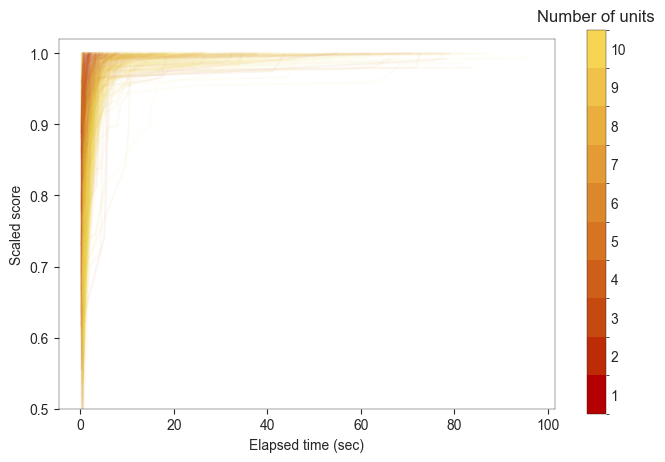

In [56]:
results_subset = results_seqBORG[results_seqBORG['number_of_units'] == 10]
# sns.set_style('white')
fig, ax = plt.subplots()
for n, i in enumerate(results_seqBORG.hue.unique()):
    scatter = results_seqBORG[results_seqBORG['hue']==i].plot.line(x='elapsed_time', y='scaled score', ax=ax, legend=False, c=cols[n], alpha=0.05)

sns.set_style('ticks')

ax.set_ylabel('Scaled score')
ax.set_xlabel('Elapsed time (sec)')
# ax.set_xlabel('nfe')
plt.ylim([0.5,1.02])
# plt.xlim([0,0.6])

# clb = plt.colorbar(scatter, shrink=0.5, anchor=(-0.2,0.2))
# clb.ax.tick_params(labelsize=8)
# clb.ax.set_title('Number of units', horizontalalignment='left', verticalalignment='bottom', fontsize=10)

# norm = mpl.colors.Normalize(vmin=1, vmax=10) 
# fig.colorbar(mpl.cm.ScalarMappable(norm=norm,cmap=my_cmap), ax=ax)


bounds = [i-0.5 for i in results_seqBORG['number_of_units'].unique()] + [max(results_seqBORG['number_of_units'].unique())+0.5]
norm = mpl.colors.BoundaryNorm(bounds, my_cmap.N)
ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
# cb = plt.colorbar.ColorbarBase(ax2, cmap=my_cmap, norm=norm,
#     spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=my_cmap),
             cax=ax2, orientation='vertical',
             # label="Number of units", 
             ticks=[i for i in range(11)])

cbar.ax.set_title('Number of units')
cbar.ax.tick_params(size=0)

fig.savefig('figs/sequential_simopt_units_BORG_lines.png', dpi=500, bbox_inches="tight")

# ax.get_legend().remove()
# sns.lineplot(x=results_subset['elapsed_time'], y=results_subset['scaled score'], 
#              hue=results_subset['seed'], palette=my_cmap, alpha=0.5)

# sns.lineplot(x=results_seqBORG['elapsed_time'], y=results_seqBORG['scaled score'],
#             hue=results_seqBORG['number_of_units'], palette=my_cmap, alpha=0.05)

In [57]:
results_seqBORG.hue.unique()

array(['1-0-0', '1-0-1', '1-0-2', '1-0-3', '1-0-4', '1-1-0', '1-1-1',
       '1-1-2', '1-1-3', '1-1-4', '1-2-0', '1-2-1', '1-2-2', '1-2-3',
       '1-2-4', '1-3-0', '1-3-1', '1-3-2', '1-3-3', '1-3-4', '1-4-0',
       '1-4-1', '1-4-2', '1-4-3', '1-4-4', '1-5-0', '1-5-1', '1-5-2',
       '1-5-3', '1-5-4', '1-6-0', '1-6-1', '1-6-2', '1-6-3', '1-6-4',
       '1-7-0', '1-7-1', '1-7-2', '1-7-3', '1-7-4', '1-8-0', '1-8-1',
       '1-8-2', '1-8-3', '1-8-4', '1-9-0', '1-9-1', '1-9-2', '1-9-3',
       '1-9-4', '2-0-0', '2-0-1', '2-0-2', '2-0-3', '2-0-4', '2-1-0',
       '2-1-1', '2-1-2', '2-1-3', '2-1-4', '2-2-0', '2-2-1', '2-2-2',
       '2-2-3', '2-2-4', '2-3-0', '2-3-1', '2-3-2', '2-3-3', '2-3-4',
       '2-4-0', '2-4-1', '2-4-2', '2-4-3', '2-4-4', '2-5-0', '2-5-1',
       '2-5-2', '2-5-3', '2-5-4', '2-6-0', '2-6-1', '2-6-2', '2-6-3',
       '2-6-4', '2-7-0', '2-7-1', '2-7-2', '2-7-3', '2-7-4', '2-8-0',
       '2-8-1', '2-8-2', '2-8-3', '2-8-4', '2-9-0', '2-9-1', '2-9-2',
       '2-9-3', '2-9

In [58]:
results_subset

,Unnamed: 0,nfe,best_score,elapsed_time,pi_0,pi_1,pi_2,pi_3,pi_4,pi_5,...,probability_SPX,probability_UM,number_of_units,number_of_nodes,config,seed,scaled score,improvement,elapsed time (min),hue
4810,0,100,0.558,0.513270,1.0,14.0,7.0,9.0,97.0,16.0,...,0.166667,0.166667,10,900,0,0,0.799427,0.000,0.008554,10-0-0
4791,2,398,0.572,0.942145,1.0,14.0,20.0,9.0,97.0,18.0,...,0.173077,0.057692,10,900,0,0,0.819484,0.014,0.015702,10-0-0
4792,3,547,0.604,1.494732,1.0,15.0,4.0,54.0,57.0,40.0,...,0.105769,0.038462,10,900,0,0,0.865330,0.032,0.024912,10-0-0
4793,4,694,0.610,1.661612,1.0,0.0,52.0,48.0,22.0,107.0,...,0.115385,0.057692,10,900,0,0,0.873926,0.006,0.027694,10-0-0
4794,5,843,0.620,1.823395,1.0,2.0,19.0,31.0,9.0,18.0,...,0.115385,0.057692,10,900,0,0,0.888252,0.010,0.030390,10-0-0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5902,52,7861,0.534,8.826381,43.0,21.0,63.0,38.0,8.0,15.0,...,0.009434,0.028302,10,900,9,4,0.970909,0.006,0.147106,10-9-4
5903,59,8913,0.536,9.840998,43.0,21.0,63.0,38.0,29.0,15.0,...,0.009434,0.009434,10,900,9,4,0.974545,0.002,0.164017,10-9-4
5904,104,15673,0.538,16.327219,41.0,21.0,63.0,38.0,37.0,15.0,...,0.009434,0.009434,10,900,9,4,0.978182,0.002,0.272120,10-9-4
5905,160,24085,0.542,24.221668,43.0,21.0,63.0,38.0,41.0,9.0,...,0.009434,0.009434,10,900,9,4,0.985455,0.004,0.403694,10-9-4


In [59]:
seq_time_of_90_df = pd.DataFrame(columns=["number_of_units", "time_of_90", "nfe_of_90", "config", "seed"])
seq_time_of_95_df = pd.DataFrame(columns=["number_of_units", "time_of_95", "nfe_of_95", "config", "seed"])

for num_nodes in results_seqBORG['number_of_units'].unique():
    for seed in results_seqBORG['seed'].unique():
        for config in results_seqBORG['config'].unique():
            results_subset = results_seqBORG.query(f"config == {config} & seed == {seed} & number_of_units == {num_nodes}")

            row_of_first_90 = results_subset[results_subset['scaled score'].ge(0.9)].drop_duplicates(subset='seed', keep='first')
            row_of_first_95 = results_subset[results_subset['scaled score'].ge(0.95)].drop_duplicates(subset='seed', keep='first')
            # if len(row_of_first_95) == 0: 
            #     row_of_first_95 = results_subset.drop_duplicates(subset='seed', keep='last')
            #     row_of_first_95['elapsed_time'] = [-5]
            #     row_of_first_95['nfe'] = [-5]
            #     print('95% not found')
            seq_time_of_90_df = pd.concat([seq_time_of_90_df, row_of_first_90], ignore_index=True)
            seq_time_of_95_df = pd.concat([seq_time_of_95_df, row_of_first_95], ignore_index=True)

seq_time_of_90_df['nfe_of_90'] = seq_time_of_90_df['nfe']
seq_time_of_90_df['time_of_90'] = seq_time_of_90_df['elapsed_time']
seq_time_of_95_df['nfe_of_95'] = seq_time_of_95_df['nfe']
seq_time_of_95_df['time_of_95'] = seq_time_of_95_df['elapsed_time']

seq_time_of_90_df=seq_time_of_90_df.drop(['elapsed_time', 'nfe', 'best_score', 'scaled score', 'improvement'], axis=1)
seq_time_of_95_df=seq_time_of_95_df.drop(['elapsed_time', 'nfe', 'best_score', 'scaled score', 'improvement'], axis=1)

seq_time_of_90_df.insert(1, 'algorithm', 'sequential simulation-optimization, \n metaheuristic')
seq_time_of_95_df.insert(1, 'algorithm', 'sequential simulation-optimization, \n metaheuristic')

seq_time_of_90_df

,number_of_units,algorithm,time_of_90,nfe_of_90,config,seed,Unnamed: 0,pi_0,pi_1,pi_2,...,pi_9,probability_SBX,probability_PCX,probability_DE,probability_UNDX,probability_SPX,probability_UM,number_of_nodes,elapsed time (min),hue
0,1,"sequential simulation-optimization, \n metaheu...",0.228755,100.0,0,0,0.0,10.0,NaN,NaN,...,NaN,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,900.0,0.003813,1-0-0
1,1,"sequential simulation-optimization, \n metaheu...",0.541244,551.0,1,0,3.0,5.0,NaN,NaN,...,NaN,0.247619,0.342857,0.076190,0.257143,0.038095,0.038095,900.0,0.009021,1-1-0
2,1,"sequential simulation-optimization, \n metaheu...",0.186827,100.0,2,0,0.0,2.0,NaN,NaN,...,NaN,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,900.0,0.003114,1-2-0
3,1,"sequential simulation-optimization, \n metaheu...",0.194942,100.0,3,0,0.0,29.0,NaN,NaN,...,NaN,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,900.0,0.003249,1-3-0
4,1,"sequential simulation-optimization, \n metaheu...",0.199034,100.0,4,0,0.0,10.0,NaN,NaN,...,NaN,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,900.0,0.003317,1-4-0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,10,"sequential simulation-optimization, \n metaheu...",0.575755,100.0,5,4,0.0,233.0,74.0,10.0,...,148.0,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,900.0,0.009596,10-5-4
496,10,"sequential simulation-optimization, \n metaheu...",15.180918,1290.0,6,4,8.0,32.0,1.0,15.0,...,1.0,0.594340,0.216981,0.103774,0.028302,0.009434,0.047170,900.0,0.253015,10-6-4
497,10,"sequential simulation-optimization, \n metaheu...",3.907316,2911.0,7,4,19.0,0.0,0.0,44.0,...,4.0,0.877358,0.018868,0.028302,0.009434,0.009434,0.056604,900.0,0.065122,10-7-4
498,10,"sequential simulation-optimization, \n metaheu...",3.730714,3073.0,8,4,20.0,17.0,0.0,67.0,...,2.0,0.943396,0.009434,0.018868,0.009434,0.009434,0.009434,900.0,0.062179,10-8-4


Text(0.5, 0, 'Number of units')

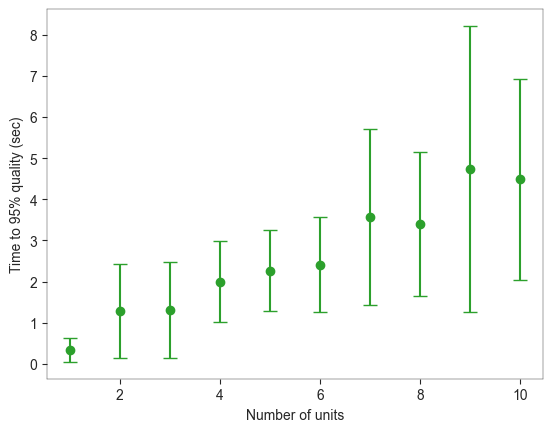

In [60]:
errorplot_x = list(seq_time_of_95_df['number_of_units'].unique())
errorplot_y = []
errorplot_yerr = []

for num_nodes in seq_time_of_95_df['number_of_units'].unique():
    results_subset = seq_time_of_95_df.query(f"number_of_units == {num_nodes}")
    errorplot_y.append(np.mean(results_subset['time_of_95']))
    errorplot_yerr.append(np.std(results_subset['time_of_95']))

plt.errorbar(x=errorplot_x, y=errorplot_y, yerr=errorplot_yerr, fmt='o', capsize=5, c='tab:green')
plt.ylabel('Time to 95% quality (sec)')
plt.xlabel('Number of units')

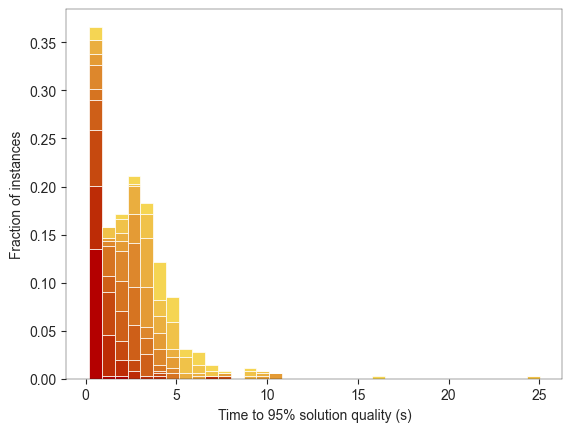

In [61]:
import matplotlib.colors as mcolors

dfs = [seq_time_of_95_df.query(f"number_of_units == {num_nodes}")['time_of_95'] for num_nodes in seq_time_of_95_df['number_of_units'].unique()]

color_list = [mcolors.rgb2hex(my_cmap(i)) for i in range(10)]
# sns.histplot(seq_time_of_95_df, x='time_of_95', hue='number_of_units', palette=my_cmap_r, legend=False, bins=40, linewidth=0.5, stat='density', multiple='stack')
plt.hist(dfs, bins=35, color=color_list, density=1, stacked=True, linewidth=0.5)
# plt.hist(dfs, bins=20, color=color_list,stacked=True)
# plt.hist(seq_time_of_95_df['time_of_95'], bins=20, color='#b40000', density=1,stacked=True)
plt.xlabel('Time to 95% solution quality (s)')
plt.ylabel('Fraction of instances')
# plt.ylim([0, 3])

plt.savefig('figs/stacked_hist_MH_units_seq.png', dpi=500, bbox_inches="tight")

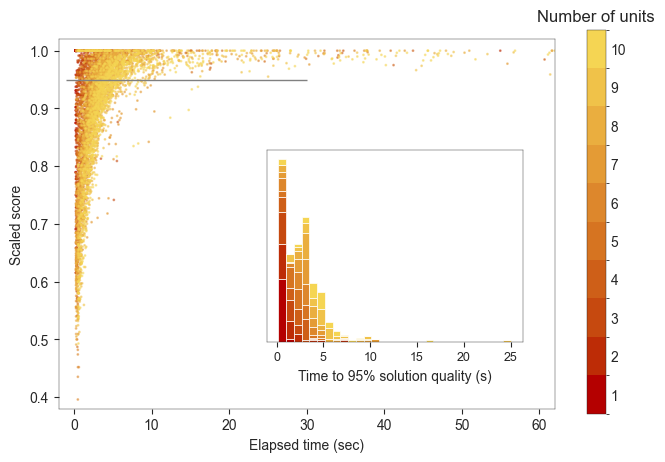

In [62]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as mpatches
import matplotlib as mpl

mpl.rcParams['axes.linewidth'] = 0.3

fig, ax = plt.subplots()
ax.hlines(0.95, xmin=-1, xmax=30, linewidth=1, color='grey')
scatter = ax.scatter(results_seqBORG['elapsed_time'], results_seqBORG['scaled score'],
                     c=results_seqBORG['number_of_units'], s=1, cmap=my_cmap, alpha=0.5)
# scatter = ax.scatter(results_seqBORG['nfe'], results_seqBORG['scaled score'], c=results_seqBORG['number_of_units'], s=1, cmap=my_cmap)
sns.set_style('ticks')

ax.set_ylabel('Scaled score')
ax.set_xlabel('Elapsed time (sec)')
# ax.set_xlabel('nfe')
plt.ylim([0.38,1.02])
plt.xlim([-2,62])

# legend - cont colorbar
# clb = plt.colorbar(scatter, shrink=0.5, anchor=(-0.2,0.2))
# clb.ax.tick_params(labelsize=8)
# clb.ax.set_title('Number of units', horizontalalignment='left', verticalalignment='bottom', fontsize=10)

# legend - patches
# plt.legend([mpatches.Patch(color=my_cmap(b)) for b in range(10)],
#            [f'{num}' for num in results_seqBORG['number_of_units'].unique()], 
#            title='Number of units', 
#            loc=1, bbox_to_anchor=(1.3, 1),
#            fontsize='10')

# legend - discrete colorbar
# bounds = results_seqBORG['number_of_units'].unique()
bounds = [i-0.5 for i in results_seqBORG['number_of_units'].unique()] + [max(results_seqBORG['number_of_units'].unique())+0.5]
norm = mpl.colors.BoundaryNorm(bounds, my_cmap.N)
ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
# cb = plt.colorbar.ColorbarBase(ax2, cmap=my_cmap, norm=norm,
#     spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=my_cmap),
             cax=ax2, orientation='vertical',
             # label="Number of units", 
             ticks=[i for i in range(11)])
cbar.ax.set_title('Number of units')
cbar.ax.tick_params(size=0)

# this is an inset axes over the main axes
a = plt.axes([.45, .25, .4, .4])
n, bins, patches = plt.hist(dfs, bins=30, color=color_list, density=1, stacked=True, linewidth=0.5)
# sns.histplot(seq_time_of_95_df, x='time_of_95', hue='number_of_units', palette=my_cmap, legend=False, bins=40, linewidth=0.3, stat='density', multiple='stack')

plt.xlabel('Time to 95% solution quality (s)')
# plt.ylabel('Frequency')

# plt.title('Probability')
plt.xticks(fontsize=9)
plt.yticks([])

plt.savefig('figs/final/MH_units_seq.png', dpi=500, bbox_inches="tight")
plt.show()


# Pydsol - borg

In [63]:
results_pydsolBORG = pd.read_csv('cleaned_data/pydsol_borg_MH/df_pydsol_borg_units_cleaned.csv')

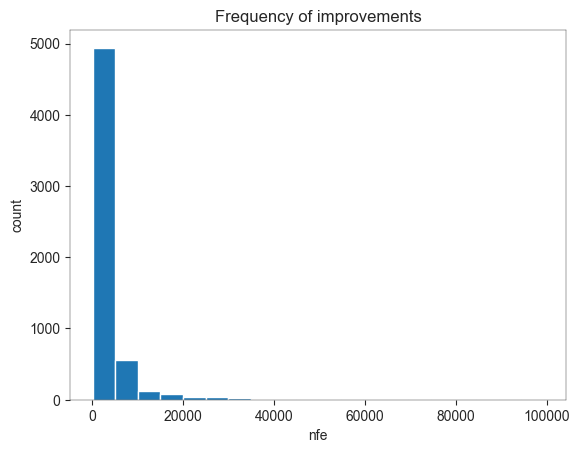

In [64]:
plt.hist(results_pydsolBORG['nfe'], bins=20)
plt.title('Frequency of improvements')
plt.xlabel('nfe')
plt.ylabel('count')
plt.show()

In [65]:
results_pydsolBORG['elapsed time (min)'] = results_pydsolBORG['elapsed_time'] / 60

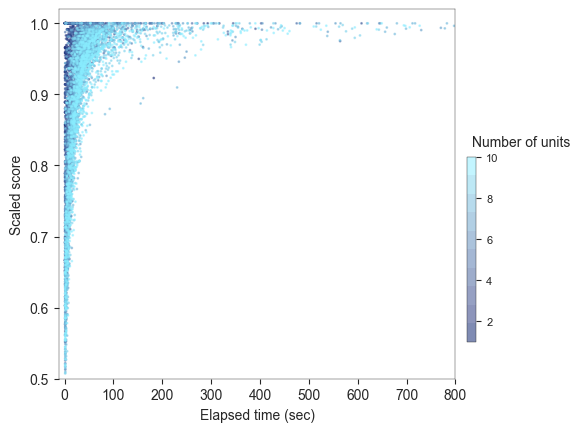

In [66]:
from matplotlib.lines import Line2D
from matplotlib.colors import LinearSegmentedColormap, to_rgb

cmap_name = 'my_list'
my_rgb = []
# colors = ['#b40000', '#c03607', '#cb5311', '#d56d1c', '#df8528', '#e89c33', '#f0b43e', '#f8cb4a', '#ffe356']
colors = ['#001969', '#1f307b', '#32498d', '#42629f', '#527cb2', '#6097c5', '#6eb3d8', '#7bd0eb', '#89edff']
for color in colors:
    my_rgb.append(to_rgb(color))
my_cmap = LinearSegmentedColormap.from_list(cmap_name, my_rgb, N=10)

fig, ax = plt.subplots()
scatter = ax.scatter(results_pydsolBORG['elapsed_time'], results_pydsolBORG['scaled score'],
                     c=results_pydsolBORG['number_of_units'], s=1, cmap=my_cmap, alpha=0.5)
# scatter = ax.scatter(results_seqBORG['nfe'], results_seqBORG['scaled score'], c=results_seqBORG['number_of_units'], s=1, cmap=my_cmap)

ax.set_ylabel('Scaled score')
ax.set_xlabel('Elapsed time (sec)')
plt.ylim([0.5, 1.02])
plt.xlim([-12,800])

clb = plt.colorbar(scatter, shrink=0.5, anchor=(-0.2, 0.2))
clb.ax.tick_params(labelsize=8)
clb.ax.set_title('Number of units', horizontalalignment='left', verticalalignment='bottom', fontsize=10)

plt.show()

fig.savefig('figs/pydsol_simopt_units_BORG.png', dpi=300, bbox_inches="tight")

In [67]:
seq_time_of_90_df_pydsol = pd.DataFrame(columns=["number_of_units", "time_of_90", "nfe_of_90", "config", "seed"])
seq_time_of_95_df_pydsol = pd.DataFrame(columns=["number_of_units", "time_of_95", "nfe_of_95", "config", "seed"])

for num_nodes in results_pydsolBORG['number_of_units'].unique():
    for seed in results_pydsolBORG['seed'].unique():
        for config in results_pydsolBORG['config'].unique():
            results_subset = results_pydsolBORG.query(f"config == {config} & seed == {seed} & number_of_units == {num_nodes}")

            row_of_first_90 = results_subset[results_subset['scaled score'].ge(0.9)].drop_duplicates(subset='seed', keep='first')
            row_of_first_95 = results_subset[results_subset['scaled score'].ge(0.95)].drop_duplicates(subset='seed', keep='first')
            # if len(row_of_first_95) == 0: 
            #     row_of_first_95 = results_subset.drop_duplicates(subset='seed', keep='last')
            #     row_of_first_95['elapsed_time'] = [-50]
            #     row_of_first_95['nfe'] = [-50]
            #     print('95% not found')
            seq_time_of_90_df_pydsol = pd.concat([seq_time_of_90_df_pydsol, row_of_first_90], ignore_index=True)
            seq_time_of_95_df_pydsol = pd.concat([seq_time_of_95_df_pydsol, row_of_first_95], ignore_index=True)

seq_time_of_90_df_pydsol['nfe_of_90'] = seq_time_of_90_df_pydsol['nfe']
seq_time_of_90_df_pydsol['time_of_90'] = seq_time_of_90_df_pydsol['elapsed_time']
seq_time_of_95_df_pydsol['nfe_of_95'] = seq_time_of_95_df_pydsol['nfe']
seq_time_of_95_df_pydsol['time_of_95'] = seq_time_of_95_df_pydsol['elapsed_time']

seq_time_of_90_df_pydsol=seq_time_of_90_df_pydsol.drop(['elapsed_time', 'nfe', 'best_score', 'scaled score', 'improvement'], axis=1)
seq_time_of_95_df_pydsol=seq_time_of_95_df_pydsol.drop(['elapsed_time', 'nfe', 'best_score', 'scaled score', 'improvement'], axis=1)

seq_time_of_90_df_pydsol.insert(1, 'algorithm', 'simulation model optimization, \n metaheuristic')
seq_time_of_95_df_pydsol.insert(1, 'algorithm', 'simulation model optimization, \n metaheuristic')

seq_time_of_95_df_pydsol

,number_of_units,algorithm,time_of_95,nfe_of_95,config,seed,Unnamed: 0,pi_0,pi_1,pi_2,...,pi_8,pi_9,probability_SBX,probability_PCX,probability_DE,probability_UNDX,probability_SPX,probability_UM,number_of_nodes,elapsed time (min)
0,1,"simulation model optimization, \n metaheuristic",1.493993,100.0,0,0,0.0,11.0,NaN,NaN,...,NaN,NaN,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,900.0,0.024900
1,1,"simulation model optimization, \n metaheuristic",2.841391,251.0,1,0,1.0,5.0,NaN,NaN,...,NaN,NaN,0.219048,0.133333,0.095238,0.209524,0.285714,0.057143,900.0,0.047357
2,1,"simulation model optimization, \n metaheuristic",1.340947,100.0,2,0,0.0,2.0,NaN,NaN,...,NaN,NaN,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,900.0,0.022349
3,1,"simulation model optimization, \n metaheuristic",1.362427,100.0,3,0,0.0,29.0,NaN,NaN,...,NaN,NaN,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,900.0,0.022707
4,1,"simulation model optimization, \n metaheuristic",4.518190,401.0,4,0,2.0,18.0,NaN,NaN,...,NaN,NaN,0.200000,0.333333,0.057143,0.219048,0.180952,0.009524,900.0,0.075303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,10,"simulation model optimization, \n metaheuristic",99.290748,7867.0,5,4,52.0,38.0,25.0,5.0,...,48.0,67.0,0.943396,0.009434,0.009434,0.009434,0.009434,0.018868,900.0,1.654846
495,10,"simulation model optimization, \n metaheuristic",23.756655,1887.0,6,4,12.0,28.0,1.0,6.0,...,0.0,1.0,0.764151,0.066038,0.132075,0.018868,0.009434,0.009434,900.0,0.395944
496,10,"simulation model optimization, \n metaheuristic",39.748347,3208.0,7,4,21.0,0.0,1.0,44.0,...,56.0,5.0,0.924528,0.009434,0.018868,0.009434,0.009434,0.028302,900.0,0.662472
497,10,"simulation model optimization, \n metaheuristic",46.530976,3800.0,8,4,25.0,33.0,0.0,67.0,...,39.0,4.0,0.933962,0.009434,0.009434,0.009434,0.009434,0.028302,900.0,0.775516


Text(0.5, 0, 'Number of units')

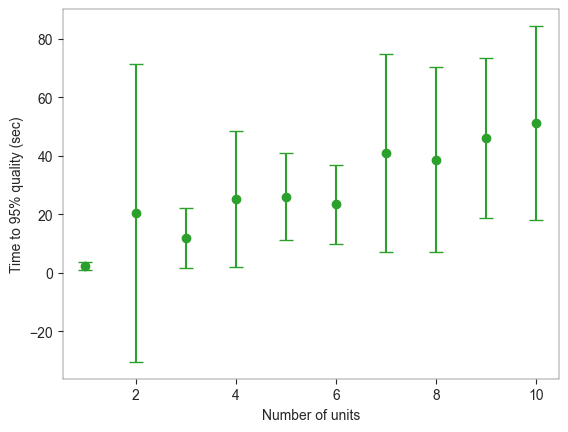

In [68]:
errorplot_x_pydsol = list(seq_time_of_95_df_pydsol['number_of_units'].unique())
errorplot_y_pydsol = []
errorplot_yerr_pydsol = []

for num_nodes in seq_time_of_95_df_pydsol['number_of_units'].unique():
    results_subset = seq_time_of_95_df_pydsol.query(f"number_of_units == {num_nodes}")
    errorplot_y_pydsol.append(np.mean(results_subset['time_of_95']))
    errorplot_yerr_pydsol.append(np.std(results_subset['time_of_95']))

plt.errorbar(x=errorplot_x_pydsol, y=errorplot_y_pydsol, yerr=errorplot_yerr_pydsol, fmt='o', capsize=5, c='tab:green')
plt.ylabel('Time to 95% quality (sec)')
plt.xlabel('Number of units')

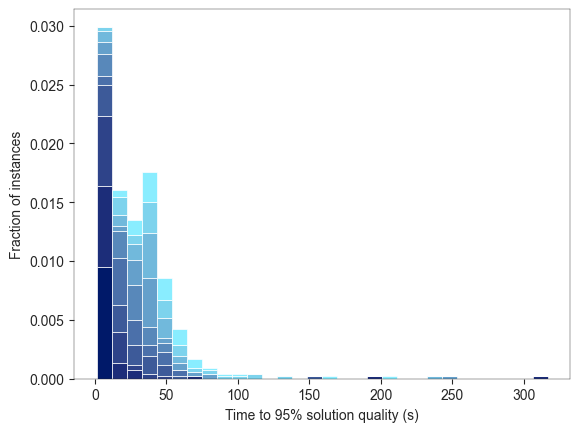

In [69]:
import matplotlib.colors as mcolors

dfs = [seq_time_of_95_df_pydsol.query(f"number_of_units == {num_units}")['time_of_95'] for num_units in seq_time_of_95_df_pydsol['number_of_units'].unique()]

color_list = [mcolors.rgb2hex(my_cmap(i)) for i in range(10)]
# sns.histplot(seq_time_of_95_df, x='time_of_95', hue='number_of_units', palette=my_cmap_r, legend=False, bins=40, linewidth=0.5, stat='density', multiple='stack')
plt.hist(dfs, bins=30, color=color_list, density=1, stacked=True, linewidth=0.5)
# plt.hist(dfs, bins=20, color=color_list,stacked=True)
# plt.hist(seq_time_of_95_df['time_of_95'], bins=20, color='#b40000', density=1,stacked=True)
plt.xlabel('Time to 95% solution quality (s)')
plt.ylabel('Fraction of instances')
# plt.ylim([0, 3])

plt.savefig('figs/stacked_hist_MH_units_pydsol.png', dpi=500, bbox_inches="tight")

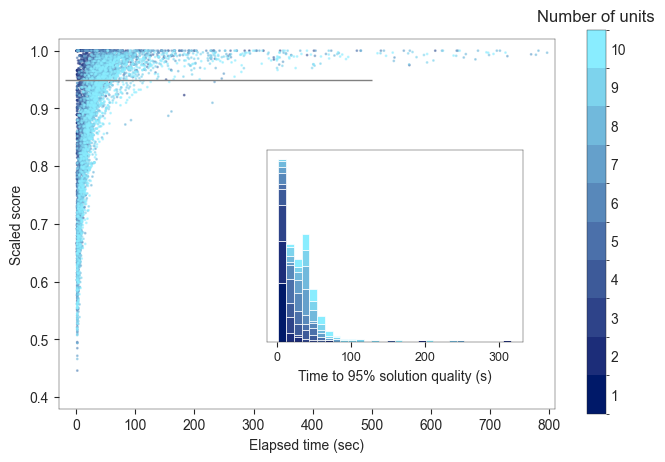

In [70]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as mpatches
import matplotlib as mpl

mpl.rcParams['axes.linewidth'] = 0.3

fig, ax = plt.subplots()
ax.hlines(0.95, xmin=-20, xmax=500, linewidth=1, color='grey')
scatter = ax.scatter(results_pydsolBORG['elapsed_time'], results_pydsolBORG['scaled score'],
                     c=results_pydsolBORG['number_of_units'], s=1, cmap=my_cmap, alpha=0.5)
# scatter = ax.scatter(results_seqBORG['nfe'], results_seqBORG['scaled score'], c=results_seqBORG['number_of_units'], s=1, cmap=my_cmap)
sns.set_style('ticks')

ax.set_ylabel('Scaled score')
ax.set_xlabel('Elapsed time (sec)')
# ax.set_xlabel('nfe')
plt.ylim([0.38,1.02])
plt.xlim([-30,810])

# legend - cont colorbar
# clb = plt.colorbar(scatter, shrink=0.5, anchor=(-0.2,0.2))
# clb.ax.tick_params(labelsize=8)
# clb.ax.set_title('Number of units', horizontalalignment='left', verticalalignment='bottom', fontsize=10)

# legend - patches
# plt.legend([mpatches.Patch(color=my_cmap(b)) for b in range(10)],
#            [f'{num}' for num in results_seqBORG['number_of_units'].unique()], 
#            title='Number of units', 
#            loc=1, bbox_to_anchor=(1.3, 1),
#            fontsize='10')

# legend - discrete colorbar
# bounds = results_seqBORG['number_of_units'].unique()
bounds = [i-0.5 for i in results_pydsolBORG['number_of_units'].unique()] + [max(results_pydsolBORG['number_of_units'].unique())+0.5]
norm = mpl.colors.BoundaryNorm(bounds, my_cmap.N)
ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
# cb = plt.colorbar.ColorbarBase(ax2, cmap=my_cmap, norm=norm,
#     spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=my_cmap),
             cax=ax2, orientation='vertical',
             # label="Number of units", 
             ticks=[i for i in range(11)])
cbar.ax.set_title('Number of units')
cbar.ax.tick_params(size=0)

nbins = 30

# this is an inset axes over the main axes
a = plt.axes([.45, .25, .4, .4])
n, bins, patches = plt.hist(dfs, bins=nbins, color=color_list, density=1, stacked=True, linewidth=0.5)
# sns.histplot(seq_time_of_95_df, x='time_of_95', hue='number_of_units', palette=my_cmap, legend=False, bins=40, linewidth=0.3, stat='density', multiple='stack')

plt.xlabel('Time to 95% solution quality (s)')
# plt.ylabel('Frequency')

# plt.title('Probability')
plt.xticks(fontsize=9)
plt.yticks([])

plt.savefig(f'figs/final/MH_units_pydsol.png', dpi=500, bbox_inches="tight")
plt.show()

# comparison

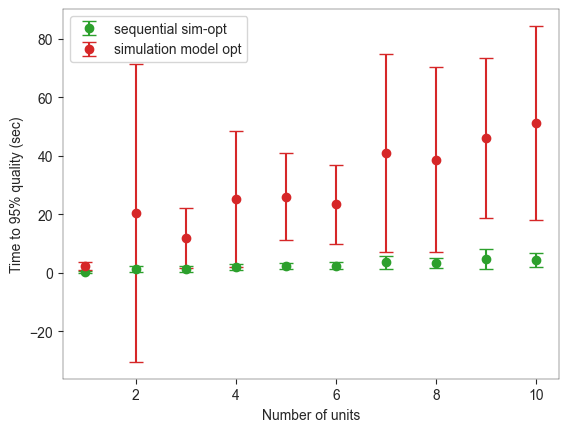

In [71]:
plt.errorbar(x=errorplot_x, y=errorplot_y, yerr=errorplot_yerr, fmt='o', capsize=5, c='tab:green', label='sequential sim-opt')
plt.errorbar(x=errorplot_x_pydsol, y=errorplot_y_pydsol, yerr=errorplot_yerr_pydsol, fmt='o', capsize=5, c='tab:red', label='simulation model opt')
plt.ylabel('Time to 95% quality (sec)')
plt.xlabel('Number of units')
plt.legend()
plt.savefig('figs/MH_units.png', dpi=300)
plt.show()

# add mip

In [72]:
seq_time_of_90_df_mip = results_MIP.copy()
seq_time_of_95_df_mip = results_MIP.copy()

seq_time_of_90_df_mip['time_of_90'] = seq_time_of_90_df_mip['elapsed time']
seq_time_of_95_df_mip['time_of_95'] = seq_time_of_95_df_mip['elapsed time']
seq_time_of_95_df_mip['avg_time_to_95'] = seq_time_of_95_df_mip['elapsed time']

seq_time_of_90_df_mip.insert(1, 'algorithm', 'sequential simulation-optimization, MIP')
seq_time_of_95_df_mip.insert(1, 'algorithm', 'sequential simulation-optimization, MIP')

In [73]:
seq_time_of_95_df_mip

,number_of_units,algorithm,elapsed time,best score,config,seed,elapsed time (min),time_of_95,avg_time_to_95
0,1,"sequential simulation-optimization, MIP",2.322139,0.002,0,0,0.038702,2.322139,2.322139
1,1,"sequential simulation-optimization, MIP",2.101434,0.002,0,1,0.035024,2.101434,2.101434
2,1,"sequential simulation-optimization, MIP",2.122241,0.002,0,2,0.035371,2.122241,2.122241
3,1,"sequential simulation-optimization, MIP",2.137482,0.002,0,3,0.035625,2.137482,2.137482
4,1,"sequential simulation-optimization, MIP",2.111553,0.002,0,4,0.035193,2.111553,2.111553
...,...,...,...,...,...,...,...,...,...
45,9,"sequential simulation-optimization, MIP",69.968768,0.674,9,0,1.166146,69.968768,69.968768
46,9,"sequential simulation-optimization, MIP",69.758060,0.674,9,1,1.162634,69.758060,69.758060
47,9,"sequential simulation-optimization, MIP",69.697351,0.674,9,2,1.161623,69.697351,69.697351
48,9,"sequential simulation-optimization, MIP",70.221138,0.674,9,3,1.170352,70.221138,70.221138


In [74]:
# seq_time_of_90_df_mip = pd.DataFrame(columns=["number_of_units", "time_of_90", "nfe_of_90", "config", "seed"])
# seq_time_of_95_df_mip = pd.DataFrame(columns=["number_of_units", "time_of_95", "nfe_of_95", "config", "seed"])
#
# for num_nodes in results_MIP['number_of_units'].unique():
#     for seed in results_MIP['seed'].unique():
#         for config in results_MIP['config'].unique():
#             results_subset = results_MIP.query(f"config == {config} & seed == {seed} & number_of_units == {num_nodes}")
#
#             row_of_first_90 = results_subset[results_subset['best score'].ge(0.9)].drop_duplicates(subset='seed', keep='first')
#             row_of_first_95 = results_subset[results_subset['best score'].ge(0.95)].drop_duplicates(subset='seed', keep='first')
#             seq_time_of_90_df_mip = pd.concat([seq_time_of_90_df_mip, row_of_first_90], ignore_index=True)
#             seq_time_of_95_df_mip = pd.concat([seq_time_of_95_df_mip, row_of_first_95], ignore_index=True)
#
# seq_time_of_90_df_mip['time_of_90'] = seq_time_of_90_df_mip['elapsed time']
# seq_time_of_95_df_mip['time_of_95'] = seq_time_of_95_df_mip['elapsed time']
#
# seq_time_of_90_df_mip.insert(1, 'algorithm', 'mip')
# seq_time_of_95_df_mip.insert(1, 'algorithm', 'mip')
#
seq_time_of_95_df_mip

,number_of_units,algorithm,elapsed time,best score,config,seed,elapsed time (min),time_of_95,avg_time_to_95
0,1,"sequential simulation-optimization, MIP",2.322139,0.002,0,0,0.038702,2.322139,2.322139
1,1,"sequential simulation-optimization, MIP",2.101434,0.002,0,1,0.035024,2.101434,2.101434
2,1,"sequential simulation-optimization, MIP",2.122241,0.002,0,2,0.035371,2.122241,2.122241
3,1,"sequential simulation-optimization, MIP",2.137482,0.002,0,3,0.035625,2.137482,2.137482
4,1,"sequential simulation-optimization, MIP",2.111553,0.002,0,4,0.035193,2.111553,2.111553
...,...,...,...,...,...,...,...,...,...
45,9,"sequential simulation-optimization, MIP",69.968768,0.674,9,0,1.166146,69.968768,69.968768
46,9,"sequential simulation-optimization, MIP",69.758060,0.674,9,1,1.162634,69.758060,69.758060
47,9,"sequential simulation-optimization, MIP",69.697351,0.674,9,2,1.161623,69.697351,69.697351
48,9,"sequential simulation-optimization, MIP",70.221138,0.674,9,3,1.170352,70.221138,70.221138


In [75]:
combined_results_90 = pd.concat([seq_time_of_90_df, seq_time_of_90_df_pydsol, seq_time_of_90_df_mip], ignore_index=True)
combined_results_95 = pd.concat([seq_time_of_95_df, seq_time_of_95_df_pydsol, seq_time_of_95_df_mip], ignore_index=True)

   number_of_units                                          algorithm  \
0                1  sequential simulation-optimization, \n metaheu...   
1                1  sequential simulation-optimization, \n metaheu...   
2                1  sequential simulation-optimization, \n metaheu...   
3                1  sequential simulation-optimization, \n metaheu...   
4                1  sequential simulation-optimization, \n metaheu...   
5                1  sequential simulation-optimization, \n metaheu...   
6                1  sequential simulation-optimization, \n metaheu...   
7                1  sequential simulation-optimization, \n metaheu...   
8                1  sequential simulation-optimization, \n metaheu...   
9                1  sequential simulation-optimization, \n metaheu...   
10               1  sequential simulation-optimization, \n metaheu...   
11               1  sequential simulation-optimization, \n metaheu...   
12               1  sequential simulation-optimizat

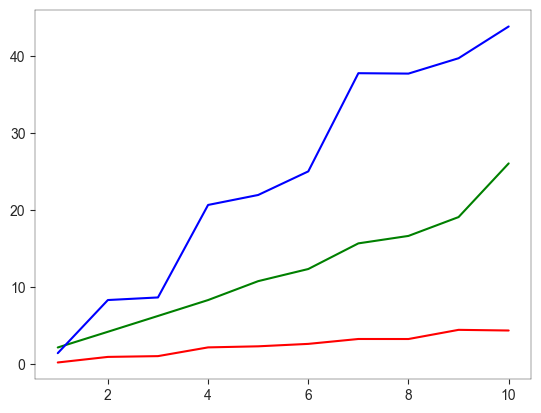

In [76]:
# calculate avg time to convergence
avgs_seq_borg = {}
avgs_seq_mip = {}
avgs_pydsol = {}

def avg_time_to_95(df, dict):
    for num_units in df['number_of_units'].unique():
        subset = df.query(f" number_of_units == {num_units}")
        print(subset)
        avg = np.median(subset['time_of_95'])
        dict[num_units] = avg

avg_time_to_95(seq_time_of_95_df, avgs_seq_borg)
avg_time_to_95(seq_time_of_95_df_mip, avgs_seq_mip)
avg_time_to_95(seq_time_of_95_df_pydsol, avgs_pydsol)

plt.plot(*zip(*sorted(avgs_seq_borg.items())), color='red')
plt.plot(*zip(*sorted(avgs_seq_mip.items())), color='green')
plt.plot(*zip(*sorted(avgs_pydsol.items())), color='blue')

In [83]:
hue_dict = {'sequential simulation-optimization, \n metaheuristic': '#b40000',
            'simulation model optimization, \n metaheuristic':'#32498d',
            'sequential simulation-optimization, MIP': 'tab:green'
            }

# sso ['#b40000', '#c03808', '#cb5614', '#d57120', '#de8a2d', '#e7a339', '#eebc46', '#f5d553', '#fbed61']
# smo ['#001969', '#1f307b', '#32498d', '#42629f', '#527cb2', '#6097c5', '#6eb3d8', '#7bd0eb', '#89edff']

C:\Users\isvandroffelaa\Documents\model\simopt\analysis\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\isvandroffelaa\Documents\model\simopt\analysis\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\isvandroffelaa\Documents\model\simopt\analysis\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\isvandroffelaa\Documents\model\simopt\analysis\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_c

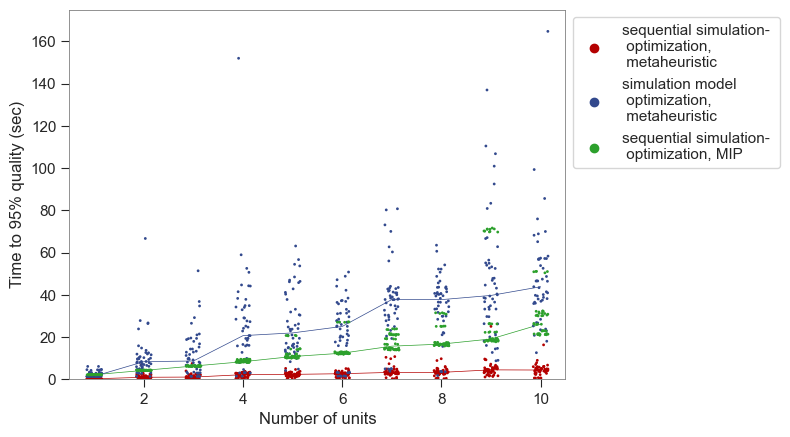

In [87]:
plt.plot(*zip(*sorted(avgs_seq_borg.items())), color='#b40000', linewidth=0.5)
plt.plot(*zip(*sorted(avgs_seq_mip.items())), color='tab:green', linewidth=0.5)
plt.plot(*zip(*sorted(avgs_pydsol.items())), color='#32498d', linewidth=0.5)

ax = sns.stripplot(data=combined_results_95, x='number_of_units', y='time_of_95', hue="algorithm", palette=hue_dict, size=2, native_scale=True, jitter=0.15)
ax.set(xlabel='Number of units', ylabel='Time to 95% quality (sec)')
# ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 7.5], list(combined_results_95['number_of_nodes'].unique()))
# ax.get_xticks()
ax.set_ylim([0, 175])
ax.set_xlim([0.5,10.5])

sns.set_context("paper")
sns.set_theme(style='ticks')
for _,s in ax.spines.items():
    s.set_linewidth(0.6)
    s.set_color('grey')
ax.tick_params(width=0.8)

handles, labels = ax.get_legend_handles_labels()
labels = ['sequential simulation- \n optimization, \n metaheuristic',
          'simulation model \n optimization, \n metaheuristic',
          'sequential simulation- \n optimization, MIP']
ax.legend(handles=handles, labels=labels, loc='upper left')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.savefig('figs/stripplot_units.png', dpi=300, bbox_inches='tight')
plt.show()

In [86]:
labels

['sequential simulation-optimization, \n metaheuristic',
 'simulation model optimization, \n metaheuristic',
 'sequential simulation-optimization, MIP']

C:\Users\isvandroffelaa\Documents\model\simopt\analysis\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\isvandroffelaa\Documents\model\simopt\analysis\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\isvandroffelaa\Documents\model\simopt\analysis\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\isvandroffelaa\Documents\model\simopt\analysis\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_c

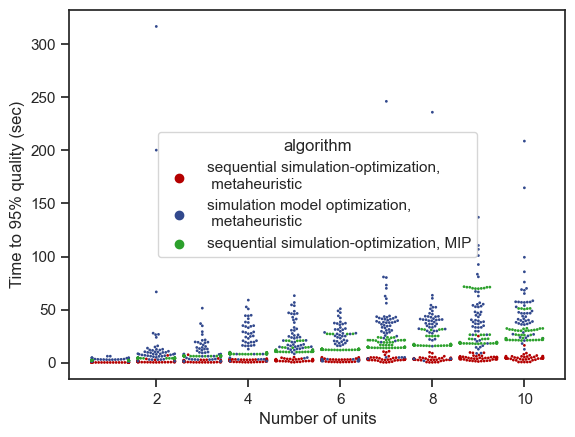

In [85]:
ax = sns.swarmplot(data=combined_results_95, x='number_of_units', y='time_of_95', hue="algorithm", palette=hue_dict, size=2, native_scale=True)
ax.set(xlabel='Number of units', ylabel='Time to 95% quality (sec)')
plt.savefig('figs/swarmplot.png', dpi=300)
plt.show()

In [ ]:
combined_results_95